In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf  
from sklearn import metrics
import os
import math
import pandas as pd

/Users/admin/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/admin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
def sigma_each(x):
    std = np.std(x, axis=0 , ddof= 1)
    std = np.array(std)
    aa = Math.pow(std,2)
    return aa

In [4]:
def AI(arr):
    trisum = 0
    result = []
    for i in range(len(arr)):
        for j in range(3):
            trisum += arr[i][j]
        
        result.append(Math.sqrt(Math.max(trisum/3,0)))
    result = np.array(result)
    return result

In [5]:
INPUT_SIGNAL_TYPES = [
    "total_acc_x_",
    "total_acc_y_",
    "total_acc_z_"
]

# Output classes to learn how to classify
LABELS = [
    "WALKING",
    "WALKING_UPSTAIRS",
    "WALKING_DOWNSTAIRS",
    "SITTING",
    "STANDING",
    "LAYING"
]

In [6]:
def load_X(X_signals_paths):
    X_signals = []

    for signal_type_path in X_signals_paths:
        file = open(signal_type_path, 'r')
        # Read dataset from disk, dealing with text files' syntax
        X_signals.append(
            [np.array(serie, dtype=np.float32) for serie in [
                row.replace('  ', ' ').strip().split(' ') for row in file
            ]]
        )
        file.close()

    return np.transpose(np.array(X_signals), (1, 2, 0))

X_train_signals_paths = [
      "UCI HAR Dataset/train/" + "Inertial Signals/" + signal + "train.txt" for signal in INPUT_SIGNAL_TYPES
]
X_test_signals_paths = [
    "UCI HAR Dataset/test/" + "Inertial Signals/" + signal + "test.txt" for signal in INPUT_SIGNAL_TYPES
]

X_train = load_X(X_train_signals_paths)
X_test = load_X(X_test_signals_paths)


# Load "y" (the neural network's training and testing outputs)

def load_y(y_path):
    file = open(y_path, 'r')
    # Read dataset from disk, dealing with text file's syntax
    y_ = np.array(
        [elem for elem in [
            row.replace('  ', ' ').strip().split(' ') for row in file
        ]],
        dtype=np.int32
    )
    file.close()

    # Substract 1 to each output class for friendly 0-based indexing
    return y_ - 1

y_train_path = "UCI HAR Dataset/train/y_train.txt"
y_test_path = "UCI HAR Dataset/test/y_test.txt"

y_train = load_y(y_train_path)
y_test = load_y(y_test_path)

In [7]:
print(y_train)
print("-------------")
print(y_test)

[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]
-------------
[[4]
 [4]
 [4]
 ...
 [1]
 [1]
 [1]]


In [8]:
print(X_train)
print("-------------")
print("-----------------------------------------------------------")
print(X_train[0])
print("-----------------------------------------------------------")
print(X_train[0][0])
print("-----------------------------------------------------------")
print(X_train[0][0][0])
print("-----------------------------------------------------------")
print(len(X_train),len(y_train))
print("-----------------------------------------------------------")

print(len(X_train[0]))
print(len(X_train[0][0]))

[[[ 1.012817   -0.1232167   0.1029341 ]
  [ 1.022833   -0.1268756   0.1056872 ]
  [ 1.022028   -0.1240037   0.1021025 ]
  ...
  [ 1.018445   -0.1240696   0.1003852 ]
  [ 1.019372   -0.1227451   0.09987355]
  [ 1.021171   -0.121326    0.09498741]]

 [[ 1.018851   -0.123976    0.09792958]
  [ 1.02238    -0.1268078   0.09935086]
  [ 1.020781   -0.1277862   0.09811381]
  ...
  [ 1.014788   -0.1290268   0.0935352 ]
  [ 1.016499   -0.1264244   0.08903516]
  [ 1.017849   -0.1305193   0.09061235]]

 [[ 1.023127   -0.1200157   0.09111667]
  [ 1.021882   -0.1214994   0.0926756 ]
  [ 1.019178   -0.1228407   0.09606378]
  ...
  [ 1.021041   -0.1308757   0.08301135]
  [ 1.022935   -0.1312099   0.08233391]
  [ 1.022019   -0.1301826   0.08148748]]

 ...

 [[ 0.7548917  -0.1711829   0.1745865 ]
  [ 0.8043137  -0.1999375   0.2324243 ]
  [ 0.831714   -0.2319457   0.2576066 ]
  ...
  [ 0.6956257  -0.2217656   0.1112952 ]
  [ 0.7479103  -0.2811496   0.1263023 ]
  [ 0.776768   -0.3275988   0.1886212 ]]

 [

In [9]:
X_train_dict = {}
labels_count = len(LABELS)

for i in range(labels_count):
    X_train_dict[i] = []

for i in range(len(X_train)):
    for X_i in X_train[i]:
        X_train_dict[y_train[i][0]].append(X_i)
        
# for i in range(labels_count):
#     X_train_dict[i] = np.array(X_train_dict[i])
#     for elem in X_train_dict[i]:
        

In [10]:
# import more_itertools as mit

# all_windows = []

# for X_i in X_train:
#     window_i = list(mit.windowed(X_i,n=64))
#     window_i = np.array(window_i)
#     all_windows.append(window_i)

# print(len(all_windows))
# print("----------------")
# print(len(all_windows[0]))

# print(list(mit.windowed(X_train, n=64)))

In [11]:
def equation_bi(X_train):
    all_std = []
    
    for X_i in X_train:
        std_i = np.std(X_i,axis=0)
        all_std.append(std_i)
        
    all_std = np.array(all_std)
    ai = np.sum(all_std**2,axis=1)/3
    ai[ai<0] = 0
    ai = np.sqrt(ai)
    
    return ai

In [12]:
ai = equation_bi(X_train)

In [13]:
ai_y = []
for i in range(len(y_train)):
    ai_y.append([ai[i],y_train[i][0]])

ai_y = np.array(ai_y)

# print(ai_y.shape)
# print(ai_y)

In [14]:
df = pd.DataFrame(ai_y).groupby(1,as_index=True)

idx = {}
df_key = {}
for key,item in df:
    idx[key] = df.get_group(key).index
    df_key[key] = df.get_group(key)

# print(df_key[0].values)
    
# print(idx)

In [15]:
import matplotlib.pyplot as plt
import matplotlib

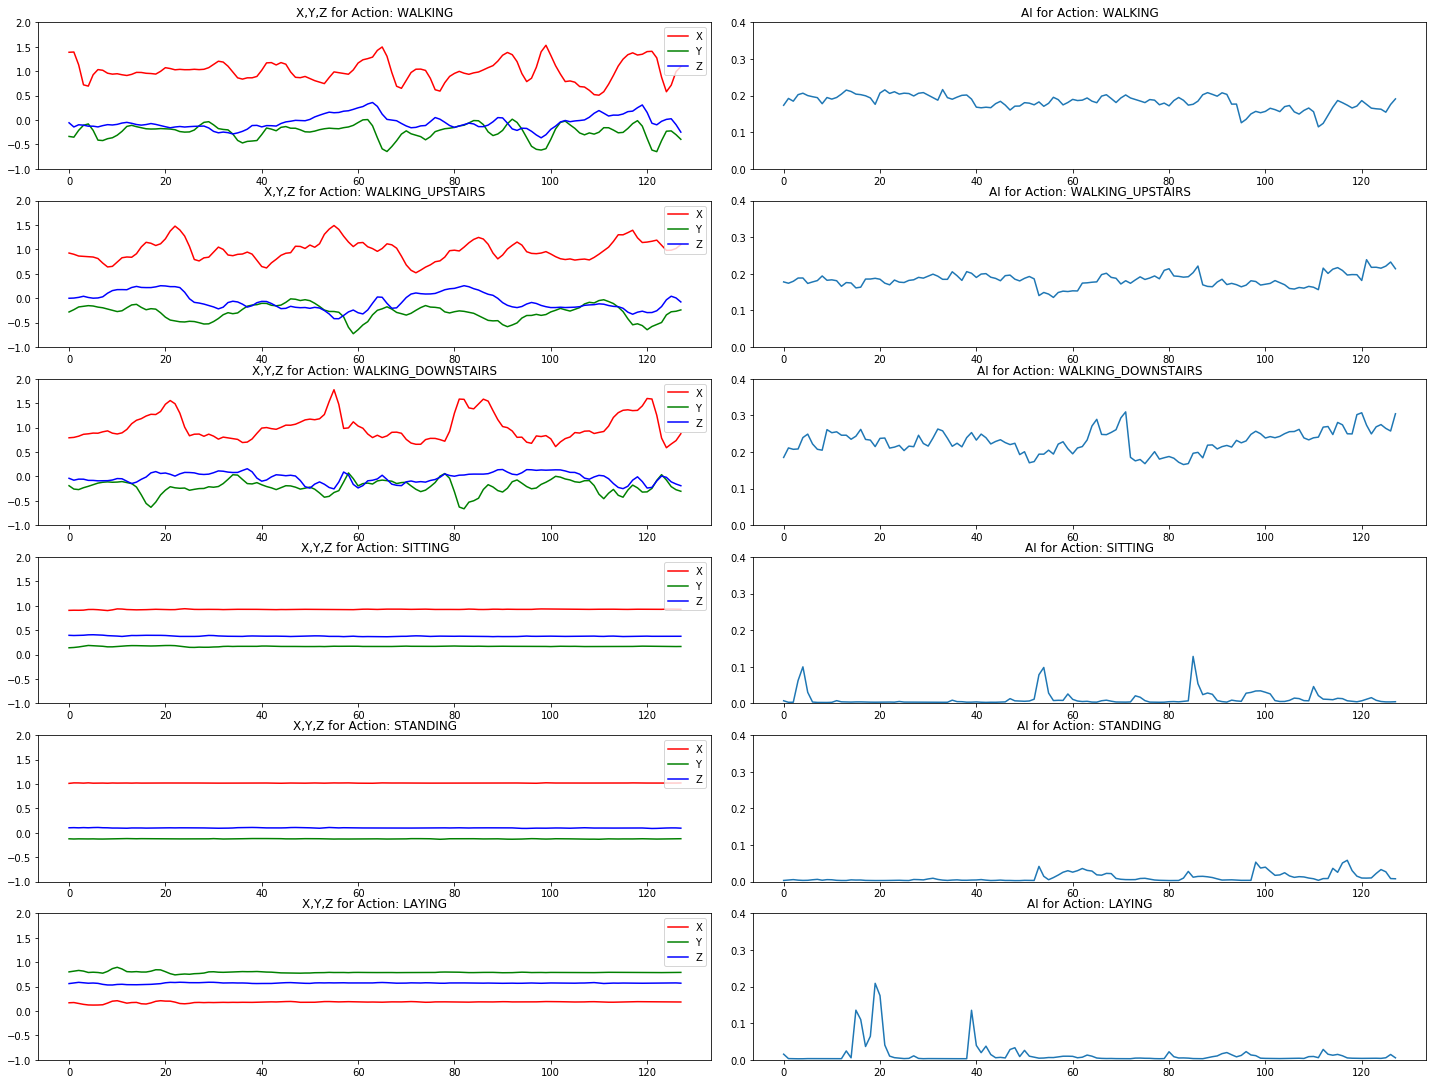

<Figure size 1152x648 with 0 Axes>

In [17]:
ai_lb = {}
for i in range(labels_count):
    ai_lb[i] = df_key[i][0].values
# print(ai_lb)

fig, axes = plt.subplots(nrows=labels_count, ncols=2, figsize=(20,15))
fig.tight_layout()

X_train_x = []
X_train_y = []
X_train_z = []
ai_128 = []

for i in range(labels_count):
    X_train_dict[i] = np.array(X_train_dict[i])
    for j in range(128):
        elem = X_train_dict[i][j]
        X_train_x.append(elem[0])
        X_train_y.append(elem[1])
        X_train_z.append(elem[2])
    
    ax = axes[i,0]
    ax.plot(X_train_x,'r',label='X')
    ax.plot(X_train_y,'g',label='Y')
    ax.plot(X_train_z,'b',label='Z')
    ax.set_title('X,Y,Z for Action: ' + LABELS[i])
    ax.set_ylim(bottom=-1.0,top=2.0)
    ax.legend(loc='upper right')
    
    for j in range(128):
        ai_128.append(ai_lb[i][j])
        
    ax = axes[i,1]
    ax.plot(ai_128)
    ax.set_title('AI for Action: ' + LABELS[i])
    ax.set_ylim(bottom=0.0,top=0.4)
    
    X_train_x.clear()
    X_train_y.clear()
    X_train_z.clear()
    ai_128.clear()
    
plt.figure(figsize=(16,9))
fig.savefig('fig3.png', dpi = 300)

plt.show()